In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn  as sns
from plotly import express as px
import datetime as dt
import os
import statistics
import statistics
import scipy.stats
from scipy import stats
sns.set()


In [ ]:
df = pd.read_csv("/content/StudentsPerformance.csv")
df.info()
df.head( 50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
null_hypo=df['math score'].mean()

In [ ]:
df['math score'].mean()

66.089

In [ ]:
df['math score'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64>

In [ ]:
df['math score'].mode

<bound method Series.mode of 0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


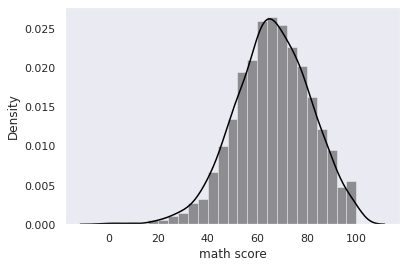

In [ ]:
sns.set(style="dark")
sns.distplot(df['math score'], kde=True, color="black")

In [ ]:
print(df[df['gender']=='male']['math score'].mean())

68.72821576763485


In [ ]:
print(df[df['gender']=='female']['math score'].mean())

63.633204633204635


In [ ]:
statistics.variance(df['math score'])

229.918997997998

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


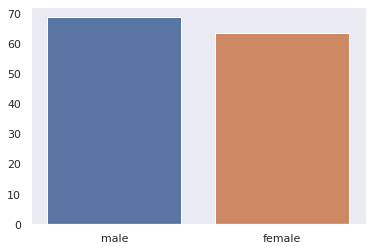

In [ ]:
x=["male", "female"]
y=[df[df['gender']=='male']['math score'].mean(),df[df['gender']=='female']['math score'].mean()]
sns.barplot(x,y)

From this we found out mean of male and female scores

In [ ]:
#z test
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

alpha=0.05

ztest_Score, p_value= ztest(df['math score'],value = null_hypo, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis thus null hypothesis true")

Fail to Reject NUll Hypothesis thus null hypothesis true


In [ ]:
#T test

df2=df.head(40)

t_value,p_value=stats.ttest_1samp(df2['math score'],61.05)#,
two_tailed_p_value=float("{:.6f}".format(p_value))
print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one tailed test is %f'%two_tailed_p_value)

alpha = 0.1

if two_tailed_p_value<=alpha:
  print('Null Hypothesis is rejected')

else:
  print('We do not reject the Null Hypothesis ')

Test statistic is 0.967878
p-value for one tailed test is 0.339069
We do not reject the Null Hypothesis 


In [ ]:
df['math score'].var()

print('Null hypothesis states that varaince = ',df['math score'].var())
print('althernate hypothesis states that varaince != ',df['math score'].var())

Null hypothesis states that varaince =  229.91899799799796
althernate hypothesis states that varaince !=  229.91899799799796


In [ ]:
#chisquare test
import math
alpha=0.05/2
dof=df2.shape[0]-1

rejectionRegion=scipy.stats.chi2.ppf(1-alpha,dof)
print(rejectionRegion)

n=df.shape[0]
variance=df['math score'].var()
standDev=math.sqrt(df2['math score'].var())
chisquareval=(float)((n-1)*standDev*standDev)

chisquareval=chisquareval/variance
chisquareval

58.12005973468633


1159.5490753695046

In [ ]:
if chisquareval <=rejectionRegion:
  print("cannot reject null hypotheses")
else:
  print('Reject null hypothesis')

Reject null hypothesis
